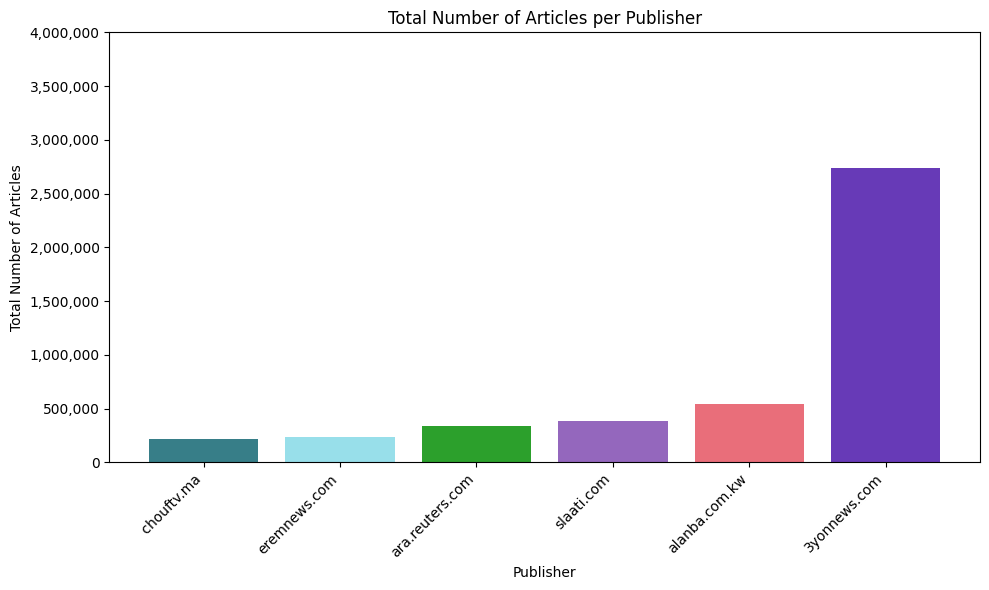

In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("Chart from CSV") \
    .getOrCreate()

# Load the CSV file into a DataFrame
file_path = r"C:\Users\96659\Desktop\python_ws\‏‏top_publisher.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Split the 'total_article_count;publisher' column into two separate columns
df_split = df.withColumn("total_article_count", split(col("total_article_count;publisher"), ";").getItem(0)) \
             .withColumn("publisher", split(col("total_article_count;publisher"), ";").getItem(1))

# Select only the necessary columns and cast the count to integer
df_cleaned = df_split.select(
    col("total_article_count").cast("int"),
    col("publisher")
)


# Group by publisher and sum total articles
publisher_count_df = df_cleaned.groupBy("publisher") \
    .sum("total_article_count") \
    .orderBy("sum(total_article_count)")

# Collect the data to a Pandas DataFrame for visualization
pandas_df = publisher_count_df.toPandas()

# Plotting the data
colors = [ '#377e88', '#98dfea', '#2ca02c',
          '#9467bd', '#e96e7a', '#673ab7', '#17becf']

plt.figure(figsize=(10, 6))
plt.bar(pandas_df['publisher'], pandas_df['sum(total_article_count)'], color=colors)
plt.xlabel('Publisher')
plt.ylabel('Total Number of Articles')
plt.title('Total Number of Articles per Publisher')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 4000001, 500000), [f"{i:,d}" for i in range(0, 4000001, 500000)])
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()
